In [1]:
from sympy import *
init_printing()

VMR, IR, dphiR = symbols('V_MR I_R \dot{\phi}_R')
VML, IL, dphiL = symbols('V_ML I_L \dot{\phi}_L')
R, KE = symbols('R K_E')
eq1_R = Eq(VMR, R*IR + KE*dphiR)
eq1_L = Eq(VML, R*IL + KE*dphiL)

print('モーターの回路方程式')
IR = solve(eq1_R, IR)[0]
IL = solve(eq1_L, IL)[0]
# eq1_L = Eq(IL, solve(eq1_L, IL)[0])

print('IR= ')
display(IR)
print('IL= ')
display(IL)

モーターの回路方程式
IR= 


IL= 


In [2]:
tau_R, tau_L = symbols('tau_R tau_L')
KT = symbols('K_T')

# eq2_R = Eq(tau_R, KT*IR)
# eq2_L = Eq(tau_L, KT*IL)
tau_R = KT*IR
tau_L = KT*IL
print('電流-トルクの関係式')
display(tau_R)
display(tau_L)

電流-トルクの関係式


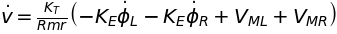

In [3]:
m, v, x, dotv, dotx = symbols('m v x \dot{v} \dot{x}')
FR, FL  = symbols('F_R F_L')
r, Ng = symbols('r N_{G}')
FR = tau_R/r
FL = tau_L/r

eq3_v = Eq(dotv, (FR+FL)/m); 
eq3_x = Eq(v, dphiR*Ng*r+dphiL*Ng*r );
# eq3_vx = Eq(dotx, v)

display(simplify(eq3_v), eq3_x)

ここで式を簡単にするために，
$$ \dot{\phi}:= \dot{\phi}_R + \dot{\phi}_L $$
$$ V_m := V_R + V_L$$
と定義する．すると，

In [4]:
dphi, Vm = var('\dot{\phi} V_m')

eq4_v = Eq(dotv, KT/R*m*r(-KE*dphi+ Vm))
eq4_phi = Eq(v, Ng*dphi*r)
eq4_x = Eq(dotx, v)

display(eq4_v, eq4_phi, eq4_x)

#### この式を $\dot{x},\dot{v},\dot{phi}$について整理してみます．すると次のような状態方程式が得られます．

In [5]:
sols = solve([eq4_v, eq4_phi, eq4_x], [dotv, dphi, dotx])

eq_sol_v = Eq(dotv, sols[0][0])
eq_sol_phi = Eq(dphi, sols[0][1])
eq_sol_x = Eq(dotx, sols[0][2])

display(eq_sol_x, eq_sol_v,eq_sol_phi)

In [6]:
from sympy import var

Ldy, Ldz = var('\dot{L}_y \dot{L}_z')
g, x, y, z = var('g x y z')
xZ, yZ, zZ = var('x_Z y_Z z_Z')
xdd, ydd, zdd = var('\ddot{x} \ddot{y} \ddot{z} ')

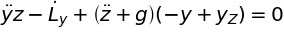

In [7]:
from sympy import solve
from IPython.display import display

E1 = Eq(z * xdd + (xZ - x) * (g + zdd))
E2 = Eq(z * ydd + (yZ - y) * (g + zdd) - Ldy)
E3 = Eq(-y * xdd + x * ydd - zZ * (g + zdd) + Ldz)
display(E1)
display(E2)
display(E3)

sols = solve([E1, E2, E3], [xdd, ydd, Ldy])



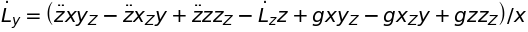

In [8]:
display(Eq(xdd,sols[xdd]))
display(Eq(ydd,sols[ydd]))
display(Eq(Ldy,sols[Ldy]))
